## NetworkX

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Undirected graph
G = nx.Graph()

Nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [3]:
G.clear()

# Add nodes and edges
G.add_node("A")
G.add_nodes_from(["B", "C"]) # Can add a list of nodes
G.add_nodes_from("DE") # This ass two nodes D and E

G.add_edge("A", "C")
G.add_edges_from([("B", "D"), ("B", "C")])
G.add_edges_from(["CD", "DE"]) # This add an edge ("C", "D")

In [4]:
# Can set the position of the nodes
pos = {
    "A": (1, 5),
    "B": (4.5, 6.6),
    "C": (3.6, 1.4),
    "D": (5.8, 3.5),
    "E": (7.9, 3.6),
}

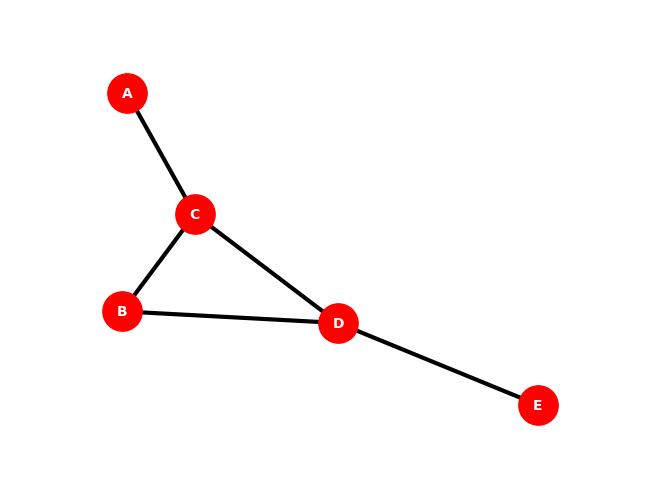

In [11]:
# Keep the graph same by setting random seed
seed = 0
random.seed(seed)
np.random.seed(seed)

# if we set pos, we don't need random seed
nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=800, font_color="white", 
        font_size=10, font_weight="bold", width=3)
plt.margins(0.2)
plt.show()

### Attributed Graph
Graph, Nodes and edges can have attributes.

In [12]:
# Undirected graph and add an attribute
G = nx.Graph()
G.graph["Name"] = "My Graph"

# Add nodes and edges with attributes, the names and values are arbitrary
# G.add_node("A", Age=19, Gender="F")
G.add_nodes_from([
    ("A", {"Age":19, "Gender":"F"}),
    ("B", {"Age":18, "Gender":"M"}),
    ("C", {"Age":22, "Gender":"M"}),
    ("D", {"Age":21, "Gender":"M"}),
    ("E", {"Age":20, "Gender":"F"})
])

# G.add_edge("A", "C", weight=1)
G.add_edges_from([
    ("A", "C", {"weight":1}),
    ("B", "C", {"weight":0.3}),
    ("B", "D", {"weight":0.5}),
    ("C", "D", {"weight":0.7}),
    ("D", "E", {"weight":1.2})
])

In [13]:
# Get the attribute of graph, node and edge
G.graph, G.nodes["A"], G.edges[("A", "C")]

({'Name': 'My Graph'}, {'Age': 19, 'Gender': 'F'}, {'weight': 1})

In [23]:
# iterate through nodes and print attributes (data=True)
for node in G.nodes(data=True):
    print(node)

('A', {'Age': 19, 'Gender': 'F'})
('B', {'Age': 18, 'Gender': 'M'})
('C', {'Age': 22, 'Gender': 'M'})
('D', {'Age': 21, 'Gender': 'M'})
('E', {'Age': 20, 'Gender': 'F'})


In [24]:
# iterate through edges and print attributes (data=True)
for edge in G.edges(data=True):
    print(edge)

('A', 'C', {'weight': 1})
('B', 'C', {'weight': 0.3})
('B', 'D', {'weight': 0.5})
('C', 'D', {'weight': 0.7})
('D', 'E', {'weight': 1.2})


### Degree and neighbors

In [25]:
print(f"# Nodes: {G.number_of_nodes()}")
print(f"# Edges: {G.number_of_edges()}")

# Nodes: 5
# Edges: 5


In [26]:
# Node degree
for node in G.nodes:
    print(f"Degree({node}) = {G.degree(node)}")

Degree(A) = 1
Degree(B) = 2
Degree(C) = 3
Degree(D) = 3
Degree(E) = 1


In [27]:
# Get nieghbors
for node in G.nodes:
    neighbor_list = [n for n in G.neighbors(node)]
    print(f"Neighbors({node}): {neighbor_list}")

Neighbors(A): ['C']
Neighbors(B): ['C', 'D']
Neighbors(C): ['A', 'B', 'D']
Neighbors(D): ['B', 'C', 'E']
Neighbors(E): ['D']


## Draw graph with attributes

In [28]:
# Use G.nodes to get the attributes of node
for node, attr in G.nodes(data=True):
    print(f"{node}, {attr}")

A, {'Age': 19, 'Gender': 'F'}
B, {'Age': 18, 'Gender': 'M'}
C, {'Age': 22, 'Gender': 'M'}
D, {'Age': 21, 'Gender': 'M'}
E, {'Age': 20, 'Gender': 'F'}


In [29]:
# Create a dictionary for drawing attribute labels
node_labels = {n:(d["Age"], d["Gender"]) for n, d in G.nodes(data=True)}
node_labels

{'A': (19, 'F'),
 'B': (18, 'M'),
 'C': (22, 'M'),
 'D': (21, 'M'),
 'E': (20, 'F')}

In [30]:
# set edge labels
edge_labels = {(u,v): d["weight"] for u,v,d in G.edges(data=True)}
edge_labels

{('A', 'C'): 1,
 ('B', 'C'): 0.3,
 ('B', 'D'): 0.5,
 ('C', 'D'): 0.7,
 ('D', 'E'): 1.2}

In [31]:
# set the coordinates of the node attributes
pos_node_attributes = {}
for node, (x,y) in pos.items():
    pos_node_attributes[node] = (x, y-0.9)
pos_node_attributes

{'A': (1, 4.1),
 'B': (4.5, 5.699999999999999),
 'C': (3.6, 0.4999999999999999),
 'D': (5.8, 2.6),
 'E': (7.9, 2.7)}

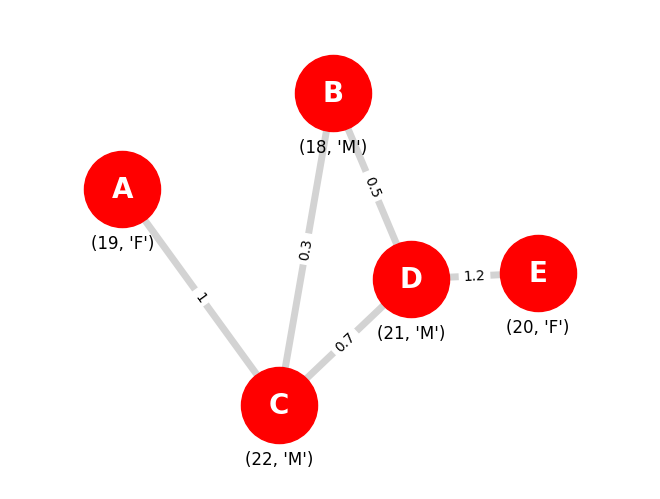

In [38]:
seed = 0
random.seed(seed)
np.random.seed(seed)

# draw graph
nx.draw(G, pos=pos, with_labels=True, node_color="red", node_size=3000, font_color="white", 
        font_size=20, font_weight="bold", width=5, edge_color="lightgray")

# draw labels
nx.draw_networkx_labels(G, pos=pos_node_attributes, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, label_pos=0.5)

plt.margins(0.2)
plt.show()

## Draw directed graph with weighted edges

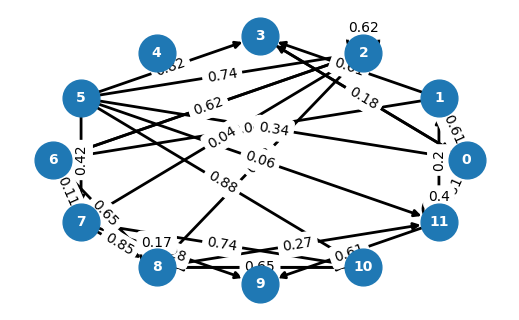

In [22]:
class RandomDG:
    def __init__(self, num_nodes: int = 12, num_edges: int = None):
        self.DG = self.get_random_DG(num_nodes, num_edges)
        
    def get_random_DG(self, num_nodes: int, num_edges:int = None) -> nx.classes.digraph.DiGraph:
        if num_edges == None:
            num_edges = np.random.randint(1, 50)
        random_DG = nx.DiGraph()
        nodes = np.arange(0, num_nodes)
        random_edges = []
        for i in range(num_edges):
            random_two_nodes = np.random.choice(nodes, size=2)  # Randomly choose 2 nodes
            random_weight = np.random.rand(1)
            random_weight = np.around(random_weight, decimals=2)
            random_edge = np.concatenate((random_two_nodes, random_weight))
            random_edges.append(random_edge)
        
        random_DG.add_nodes_from(nodes)
        random_DG.add_weighted_edges_from(random_edges)
        
        return random_DG

    def draw(self, fig_size = (5, 3), node_size=700, font_size=10, edge_width=2, edge_font_size=10):
        plt.figure(figsize=fig_size)
        pos = nx.circular_layout(self.DG)
        nx.draw(self.DG, with_labels=True, pos=pos, node_size=node_size, font_color="white", font_size=font_size, font_weight="bold", width=edge_width)
        edge_labels = {(u,v): d["weight"] for u,v,d in self.DG.edges(data=True)}
        nx.draw_networkx_edge_labels(self.DG, pos=pos, edge_labels=edge_labels, label_pos=0.5, font_size=edge_font_size)

DG = RandomDG(num_nodes=12, num_edges=30)
DG.draw()

### Get the matrics between two graphs

Paper that might be useful:
https://www.cs.cmu.edu/~jingx/docs/DBreport.pdf

In [29]:
DG1 = RandomDG(6, 20)
DG2 = RandomDG(6, 7)

# Get the graphs
G1 = DG1.DG
G2 = DG2.DG

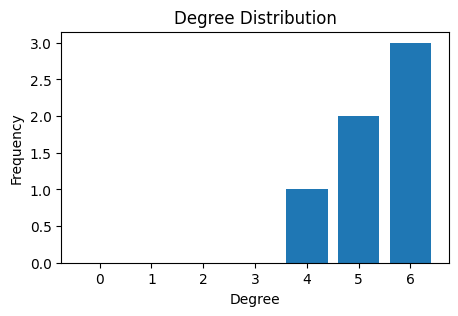

In [30]:
# Compute degree distribution
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)
degree_count = nx.degree_histogram(G1)

# Plot degree distribution
plt.figure(figsize=(5, 3))
plt.bar(range(len(degree_count)), degree_count)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [382]:
# Compare Adjacency Matrices
adj_diff = np.linalg.norm(A1 - A2)
print("Difference between adjacency matrices (Frobenius norm):", adj_diff)

# Compare Degree Matrices
deg_diff = np.linalg.norm(D1 - D2)
print("Difference between degree matrices (Frobenius norm):", deg_diff)

# Compare Laplacian Matrices
lap_diff = np.linalg.norm(L1 - L2)
print("Difference between Laplacian matrices (Frobenius norm):", lap_diff)

Difference between adjacency matrices (Frobenius norm): 2.1842389979120873
Difference between degree matrices (Frobenius norm): 6.324555320336759
Difference between Laplacian matrices (Frobenius norm): 2.749072570886407


### Compute the Similatiry between two graphs
We can use the matrices of graphs to compute their simialrities, e.g jaccard similarity, cosine similarity.

In [447]:
DG1 = RandomDG(12, 10)
DG2 = RandomDG(12, 7)
G1 = DG1.DG
G2 = DG2.DG

In [35]:
import utils
jaccard_similarity_edge = utils.jaccard_similarity_edge(G1, G2)
cos_similarity_laplacian = utils.cos_similarity_laplacian(G1, G2)
cos_similarity_adj = utils.cos_similarity_adj(G1, G2)
print(f"jaccard similarity of edges: {jaccard_similarity_edge}")
print(f"cosine similarity of laplacian matrix: {cos_similarity_laplacian}")
print(f"cosine similarity of adjacency matrix: {cos_similarity_adj}")

jaccard similarity of edges: 0.09523809523809523
cosine similarity of laplacian matrix: 0.5600017210063446
cosine similarity of adjacency matrix: 0.20442978220813376


## Compare two songs

In [15]:
from song import AnalyzedSong
import tonnetz
from tonnetz import MatrixType
from tonnetz import CentralityType
import networkx as nx
import numpy as np

DQ0 = AnalyzedSong("ABBA/Dancing Queen.mid")
DQ1 = AnalyzedSong("ABBA/Dancing Queen.1.mid")
print(f"num of tracks in dancing_queen_0: {len(DQ0.tracks)}")
print(f"num of tracks in dancing_queen_1: {len(DQ1.tracks)}")

num of tracks in dancing_queen_0: 5
num of tracks in dancing_queen_1: 9


In [3]:
print("Dancing_Queen_0 quarter transitions: ")
for i, qtransition in enumerate(DQ0.tracks[0].transitions):
    # weights = [min(MAX_EDGE_WIDTH, v * WIDTH_ADJUST * 4) for v in track.transitions[qnote].values()]
    print(f"quarter {i} transition: {qtransition}")

Dancing_Queen_0 quarter transitions: 
quarter 0 transition: {((0, 2), (1, 3)): 0.018115942028985508, ((5, 5), (7, 6)): 0.018115942028985508, ((11, 8), (12, 9)): 0.018115942028985508, ((1, 3), (0, 2)): 0.03260869565217391, ((7, 6), (5, 5)): 0.03260869565217391, ((12, 9), (11, 8)): 0.03260869565217391, ((0, 2), (2, 3)): 0.007246376811594203, ((5, 5), (8, 6)): 0.007246376811594203, ((11, 8), (8, 6)): 0.007246376811594203, ((2, 3), (2, 4)): 0.007246376811594203, ((8, 6), (7, 7)): 0.007246376811594203, ((2, 4), (4, 5)): 0.010869565217391304, ((7, 7), (10, 8)): 0.010869565217391304, ((4, 5), (7, 6)): 0.03260869565217391, ((10, 8), (12, 9)): 0.03260869565217391, ((0, 1), (3, 2)): 0.007246376811594203, ((6, 4), (8, 5)): 0.007246376811594203, ((11, 7), (8, 5)): 0.007246376811594203, ((3, 2), (0, 1)): 0.007246376811594203, ((8, 5), (6, 4)): 0.007246376811594203, ((6, 4), (4, 5)): 0.007246376811594203, ((11, 7), (10, 8)): 0.007246376811594203, ((6, 6), (4, 5)): 0.0036231884057971015, ((11, 9), (1

In [17]:
# Compute jaccard sim between two tracks based on quarter transtinos
def jaccard_sim_between_tracks(track1: tonnetz.TonnetzQuarterTrack, track2: tonnetz.TonnetzQuarterTrack):
    assert(len(track1.transitions) == len(track2.transitions)), \
        f"len of track1.transitions {len(track1.transitions)} != len of track2.transitions {len(track2.transitions)}"
        
    sim_score = 0
    for i in range(0, len(track1.transitions)):
        t1_qtrans = set(track1.transitions[i].keys())
        t2_qtrans = set(track2.transitions[i].keys())
        intersection = t1_qtrans.intersection(t2_qtrans)
        union = t1_qtrans.union(t2_qtrans)
        sim_score += len(intersection) / len(union)
    return sim_score

def first_N_tracks_jaccard_sim_score(anS1: AnalyzedSong, anS2: AnalyzedSong, N: int):
    assert(len(anS1.tracks) >= N), f"\'{anS1.artist} - {anS1.name}\' only has {len(anS1.tracks)} tracks, but require {N} tracks."
    assert(len(anS2.tracks) >= N), f"\'{anS1.artist} - {anS2.name}\' only has {len(anS2.tracks)} tracks, but require {N} tracks."
    score = 0
    for i in range(0, N):
        score += jaccard_sim_between_tracks(anS1.tracks[i], anS2.tracks[i])
    return score
        
first_3_tracks_jaccard_sim_score = first_N_tracks_jaccard_sim_score(DQ0, DQ1, 3)
print(f"first_3_tracks_jaccard_sim_score: {first_3_tracks_jaccard_sim_score}")

first_3_tracks_jaccard_sim_score: 0.9782039676030159


In [19]:
# Compute the cosine similarity between the Laplacian matrices
def cos_similarity_laplacian(track1: tonnetz.TonnetzQuarterTrack, track2: tonnetz.TonnetzQuarterTrack):
    assert(len(track1.transitions) == len(track2.transitions)), \
        f"len of track1.transitions {len(track1.transitions)} != len of track2.transitions {len(track2.transitions)}"
    
    sim_score = 0
    # Flatten the Laplacian Matrix
    L1 = track1.get_matrices(MatrixType.LAPLACIAN)
    L2 = track2.get_matrices(MatrixType.LAPLACIAN)
    
    for i in range(0, len(track1.transitions)):
        L1_flat = L1[i].flatten()
        L2_flat = L2[i].flatten()
        sim_score += np.dot(L1_flat, L2_flat) / (np.linalg.norm(L1) * np.linalg.norm(L2))
    return sim_score

def first_N_tracks_cos_similarity_laplacian(anS1: AnalyzedSong, anS2: AnalyzedSong, N: int):
    assert(len(anS1.tracks) >= N), f"\'{anS1.artist} - {anS1.name}\' only has {len(anS1.tracks)} tracks, but require {N} tracks."
    assert(len(anS2.tracks) >= N), f"\'{anS1.artist} - {anS2.name}\' only has {len(anS2.tracks)} tracks, but require {N} tracks."
    score = 0
    for i in range(0, N):
        score += cos_similarity_laplacian(anS1.tracks[i], anS2.tracks[i])
    return score
        
first_3_tracks_cos_similarity_laplacian_score = first_N_tracks_cos_similarity_laplacian(DQ0, DQ1, 3)
print(f"first_N_tracks_cos_similarity_laplacian_score: {first_3_tracks_cos_similarity_laplacian_score}")

first_N_tracks_cos_similarity_laplacian_score: 0.8536747129057707
